# Healthcare system finding causes and patterns for common diseases
Through an analysis of the extensive data, models based on logarithms will be used to identify dependencies and patterns that will contribute their utility to machine predictions.
Finally, a prediction will be determined in which common causes and patterns for common diseases will be found.


## 1. Business Understanding

The health company WGO, which works in cooperation with various states and the World Health Organization, aims to create a nearly transparent and global health system.Due to higher incomes and a stable economy, the healthcare system of the states is based on several pillars and this, in turn, ensures that people are provided with access to different medical facilities over a large area. WGO, through the step of digitization, is taking a path whereby health is not built on the economy and a monetary basis. This company aims to use machine learning to identify the causes of regional diseases and their pathogens, and thus support the health systems of the affected countries with targeted measures.
Basically, the generally formulated goal is to make a common standard of living accessible and achievable for the entire world population.

## 2. Data and Data Understanding

The data sets used, which originate from studies and research work of the World Health Organization (WHO), contain a large number of different data.
The selection, which can be used for data analysis and further processing, is diverse. A number of nearly 40 to 50 files, which contain data on different health aspects, are available.
From this amount of files not all are considered. Especially data sets are considered, which contain health aspects, which have a negative influence on the health, the well-being and the life expectancy of a person. Another important feature of these datasets is that a large proportion of the files have regional attributes, which means that the target can be compared precisely on the basis of the country names in a dataset.
Other attributes in these datasets include the separation of genders, the age of the subjects, and the number of diseases or diagnoses. In addition, some of the datasets are recorded with data over several years.

## 2.1. Import of Relevant Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

## 2. 2. Read Data.csv

In [2]:
country_health = pd.read_csv ('https://storage.googleapis.com/ml-service-repository-datastorage/Healthcare_system_finding_causes_and_patterns_for_common_diseases_data.csv')
country_health

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,NaN,NaN,NaN,0.132143,0.000000,4.480300,3.011632,...,5.96,8.2,4.0,NaN,NaN,-5.0,89.0,80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,2020-03-14,2020-03-27,2020-03-15,2020-03-21,2020-03-26,0.054474,0.361111,12.951494,9.719900,...,2.26,25.6,3.0,2.0,-4.0,-10.0,87.0,74,75.0,81.0
176,Vietnam,2020-01-23,NaN,2020-02-06,2020-03-14,2020-03-22,0.061529,NaN,16.842832,12.851948,...,1.77,2.1,60.0,46.0,9.0,NaN,NaN,23,37.0,74.0
177,West Bank and Gaza,2020-03-05,2020-03-26,2020-03-07,2020-03-22,2020-03-29,0.101132,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,86.0,65,67.0,82.0
178,Zambia,2020-03-18,2020-04-02,2020-03-25,NaN,NaN,0.104540,NaN,4.074966,3.864070,...,5.49,8.1,2.0,-5.0,NaN,-13.0,93.0,78,85.0,NaN


In [3]:
country_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 70 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_Region                             180 non-null    object 
 1   first_1ConfirmedCases                      180 non-null    object 
 2   first_1Fatalities                          133 non-null    object 
 3   first_10ConfirmedCases                     153 non-null    object 
 4   first_50ConfirmedCases                     121 non-null    object 
 5   first_100ConfirmedCases                    112 non-null    object 
 6   cases_growth                               180 non-null    float64
 7   death_growth                               130 non-null    float64
 8   Cardiovascular diseases (%)                165 non-null    float64
 9   Cancers (%)                                165 non-null    float64
 10  Diabetes, blood, & endocri

In [4]:
country_health.describe(include='all')

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
count,180,180,133,153,121,112,180.000000,130.000000,165.000000,165.000000,...,164.000000,163.000000,159.000000,141.000000,111.000000,119.000000,133.000000,180.000000,153.000000,121.000000
unique,180,51,39,45,40,37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,2020-03-14,2020-03-21,2020-03-14,2020-03-16,2020-03-14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,14,9,8,10,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.132892,0.203288,14.606034,10.290486,...,2.507256,18.711656,12.792453,3.375887,-0.441441,-2.327731,77.278195,63.233333,71.032680,74.446281
std,NaN,NaN,NaN,NaN,NaN,NaN,0.114934,0.220268,7.612798,5.659967,...,1.234763,8.931097,16.205201,12.601326,8.885826,10.672402,12.085775,17.353408,14.441998,10.840472
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.533060,1.905528,...,0.870000,2.100000,-20.000000,-31.000000,-20.000000,-24.000000,22.000000,22.000000,22.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.067456,0.054575,9.275264,5.161070,...,1.710000,9.200000,2.000000,-4.000000,-6.000000,-10.000000,72.000000,57.000000,65.000000,70.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.104198,0.169036,13.606625,9.416817,...,1.960000,20.600000,10.000000,1.000000,-1.000000,-4.000000,80.000000,66.000000,73.000000,76.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.159076,0.269818,18.030577,15.455005,...,2.950000,25.150000,17.000000,8.000000,4.500000,2.500000,86.000000,75.000000,80.000000,81.000000


In [5]:
country_health.isnull().sum()

Country_Region             0
first_1ConfirmedCases      0
first_1Fatalities         47
first_10ConfirmedCases    27
first_50ConfirmedCases    59
                          ..
school_shutdown_1death    61
FF_DayOfYear              47
case1_DayOfYear            0
case10_DayOfYear          27
case50_DayOfYear          59
Length: 70, dtype: int64

In the next step all determined duplicates from 'country_health' are completed in a for loop with the most frequent value for this respective column. The processed data set is passed in a new variable 'ch_wo_null'.

This variable is checked again for duplicates and unwanted interfering factors.

# 3. Data Analysis

The purpose of this chapter is to review, analyze, and prepare the data.

In [6]:
ch_wo_null = country_health

for columnName in country_health.iteritems():
    ch_wo_null[columnName[0]] = country_health[columnName[0]].fillna(country_health[columnName[0]].mode().iloc[0])
    
ch_wo_null.isnull().sum()

Country_Region            0
first_1ConfirmedCases     0
first_1Fatalities         0
first_10ConfirmedCases    0
first_50ConfirmedCases    0
                         ..
school_shutdown_1death    0
FF_DayOfYear              0
case1_DayOfYear           0
case10_DayOfYear          0
case50_DayOfYear          0
Length: 70, dtype: int64

In [7]:
ch_wo_null

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,2020-03-08,2020-03-16,2020-03-14,0.132143,0.000000,4.480300,3.011632,...,5.96,8.2,4.0,-0.0,-4.0,-5.0,89.0,80,68.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,2020-03-14,2020-03-27,2020-03-15,2020-03-21,2020-03-26,0.054474,0.361111,12.951494,9.719900,...,2.26,25.6,3.0,2.0,-4.0,-10.0,87.0,74,75.0,81.0
176,Vietnam,2020-01-23,2020-03-11,2020-02-06,2020-03-14,2020-03-22,0.061529,0.000000,16.842832,12.851948,...,1.77,2.1,60.0,46.0,9.0,-11.0,71.0,23,37.0,74.0
177,West Bank and Gaza,2020-03-05,2020-03-26,2020-03-07,2020-03-22,2020-03-29,0.101132,0.000000,2.533060,1.905528,...,1.77,20.2,2.0,-0.0,-4.0,-11.0,86.0,65,67.0,82.0
178,Zambia,2020-03-18,2020-04-02,2020-03-25,2020-03-16,2020-03-14,0.104540,0.000000,4.074966,3.864070,...,5.49,8.1,2.0,-5.0,-4.0,-13.0,93.0,78,85.0,76.0


In [8]:
ch_wo_null[ch_wo_null.duplicated(keep=False)]

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear


In [9]:
ch_wo_null.describe(include='all')

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
count,180,180,180,180,180,180,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,180,51,39,45,40,37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,2020-03-14,2020-03-11,2020-03-08,2020-03-16,2020-03-14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,14,56,35,69,78,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.132892,0.146819,13.599953,9.591740,...,2.441722,18.852222,11.533333,2.644444,-1.805556,-5.266667,75.638889,63.233333,70.577778,74.955556
std,NaN,NaN,NaN,NaN,NaN,NaN,0.114934,0.208093,8.018388,5.895034,...,1.196923,8.507620,15.616350,11.231252,7.178566,9.593177,10.740600,17.353408,13.352528,8.905978
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.533060,1.905528,...,0.870000,2.100000,-20.000000,-31.000000,-20.000000,-24.000000,22.000000,22.000000,22.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.067456,0.000000,6.783483,4.368508,...,1.730000,10.225000,2.000000,-2.000000,-4.000000,-11.000000,71.000000,57.000000,66.000000,73.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.104198,0.112478,13.189690,8.161231,...,1.905000,20.200000,6.000000,-0.000000,-4.000000,-10.000000,74.000000,66.000000,71.000000,76.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.159076,0.236524,17.268427,14.887029,...,2.730000,24.600000,15.000000,6.000000,0.000000,0.000000,82.250000,75.000000,79.000000,78.250000


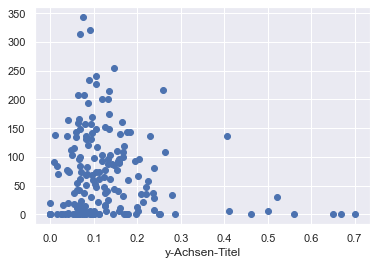

In [10]:
plt.scatter(ch_wo_null['cases_growth'],ch_wo_null['alcoholic_beverages'])
plt.xlabel('x-Achsen-Titel')
plt.xlabel('y-Achsen-Titel')
plt.show()

<AxesSubplot:xlabel='cases_growth', ylabel='alcoholic_beverages'>

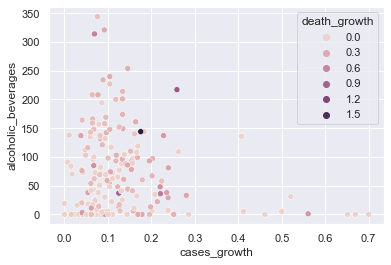

In [11]:
sns.scatterplot(data=ch_wo_null, x="cases_growth", y="alcoholic_beverages", hue="death_growth")

<AxesSubplot:xlabel='death_growth', ylabel='Density'>

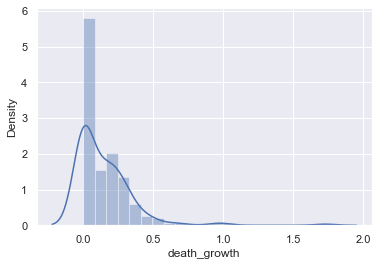

In [12]:
sns.distplot(ch_wo_null['death_growth'])
#sns.distplot(ch_wo_null['cases_growth'])
#sns.distplot(ch_wo_null['alcoholic_beverages'])
#sns.distplot(ch_wo_null['Share of deaths from smoking (%)'])
#sns.distplot(ch_wo_null['Cancers (%)'])
#sns.distplot(ch_wo_null['population growth rate'])
#sns.distplot(ch_wo_null['pneumonia-death-rates'])

In [13]:
numeric_data = ch_wo_null.select_dtypes(include=[np.number])
numeric_data

,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),"Diabetes, blood, & endocrine diseases (%)",Respiratory diseases (%),Liver disease (%),Diarrhea & common infectious diseases (%),Musculoskeletal disorders (%),HIV/AIDS and tuberculosis (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,0.174179,0.083333,8.953006,3.372082,5.273280,1.963170,0.498116,15.825522,1.962412,2.938014,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,0.068699,0.130051,27.016784,13.225390,4.571592,3.251425,1.122277,2.614149,8.372171,0.051632,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,0.158588,0.228578,17.005476,6.481729,8.614000,3.475417,0.926308,3.809944,8.204561,0.390351,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,0.082774,0.345238,13.784688,17.879279,4.381889,4.771667,1.561389,2.507505,13.608032,0.334845,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,0.132143,0.000000,4.480300,3.011632,2.733065,1.711981,1.439695,20.527999,1.839105,9.101147,...,5.96,8.2,4.0,-0.0,-4.0,-5.0,89.0,80,68.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.054474,0.361111,12.951494,9.719900,8.146976,2.856847,1.400547,4.729301,4.950649,1.615396,...,2.26,25.6,3.0,2.0,-4.0,-10.0,87.0,74,75.0,81.0
176,0.061529,0.000000,16.842832,12.851948,6.516006,4.246777,2.665962,4.698076,6.828526,3.366020,...,1.77,2.1,60.0,46.0,9.0,-11.0,71.0,23,37.0,74.0
177,0.101132,0.000000,2.533060,1.905528,2.154277,0.998996,0.430860,1.136224,1.145221,0.051632,...,1.77,20.2,2.0,-0.0,-4.0,-11.0,86.0,65,67.0,82.0
178,0.104540,0.000000,4.074966,3.864070,2.823180,1.453882,1.369252,19.027425,1.631859,22.644122,...,5.49,8.1,2.0,-5.0,-4.0,-13.0,93.0,78,85.0,76.0


## 3.1 Explorative data analysis
In this chapter, initial analyses and visualizations will be made.

In [14]:
plt.figure(figsize=(400,200))
feature_corr = numeric_data.drop("alcoholic_beverages", axis=1).corr()
feature_corr = feature_corr.drop("nbr_anaesthesiologists", axis=1)
feature_corr = feature_corr.drop("nbr_surgeons", axis=1)
feature_corr = feature_corr.drop("nbr_obstetricians", axis=1)
feature_corr = feature_corr.drop("Diarrhea & common infectious diseases (%)", axis=1)
feature_corr = feature_corr.drop("Nutritional deficiencies (%)", axis=1)
feature_corr = feature_corr.drop("pneumonia-death-rates", axis=1)
feature_corr = feature_corr.drop("Musculoskeletal disorders (%)", axis=1)
feature_corr = feature_corr.drop("total fertility rate", axis=1)
feature_corr = feature_corr.drop("life expectancy at birth", axis=1)
feature_corr = feature_corr.drop("infant mortality rate", axis=1)
feature_corr = feature_corr.drop("maternal mortality rate", axis=1)
feature_corr = feature_corr.drop("population", axis=1)
feature_corr = feature_corr.drop("birth rate", axis=1)
feature_corr = feature_corr.drop("median age", axis=1)
feature_corr = feature_corr.drop("Cancers (%)", axis=1)
feature_corr = feature_corr.drop("animal_products", axis=1)
feature_corr = feature_corr.drop("school_shutdown_1case", axis=1)
feature_corr = feature_corr.drop("school_shutdown_10case", axis=1)
feature_corr = feature_corr.drop("school_shutdown_50case", axis=1)
feature_corr = feature_corr.drop("school_shutdown_1death", axis=1)
feature_corr = feature_corr.drop("meat", axis=1)
feature_corr = feature_corr.drop("milk_-_excluding_butter", axis=1)
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

In [15]:
ch_wo_null = ch_wo_null.drop("nbr_anaesthesiologists", axis=1)
ch_wo_null = ch_wo_null.drop("nbr_surgeons", axis=1)
ch_wo_null = ch_wo_null.drop("nbr_obstetricians", axis=1)
ch_wo_null = ch_wo_null.drop("Diarrhea & common infectious diseases (%)", axis=1)
ch_wo_null = ch_wo_null.drop("Nutritional deficiencies (%)", axis=1)
ch_wo_null = ch_wo_null.drop("pneumonia-death-rates", axis=1)
ch_wo_null = ch_wo_null.drop("Musculoskeletal disorders (%)", axis=1)
ch_wo_null = ch_wo_null.drop("total fertility rate", axis=1)
ch_wo_null = ch_wo_null.drop("life expectancy at birth", axis=1)
ch_wo_null = ch_wo_null.drop("infant mortality rate", axis=1)
ch_wo_null = ch_wo_null.drop("maternal mortality rate", axis=1)
ch_wo_null = ch_wo_null.drop("population", axis=1)
ch_wo_null = ch_wo_null.drop("birth rate", axis=1)
ch_wo_null = ch_wo_null.drop("median age", axis=1)
ch_wo_null = ch_wo_null.drop("Cancers (%)", axis=1)
ch_wo_null = ch_wo_null.drop("animal_products", axis=1)
ch_wo_null = ch_wo_null.drop("school_shutdown_1case", axis=1)
ch_wo_null = ch_wo_null.drop("school_shutdown_10case", axis=1)
ch_wo_null = ch_wo_null.drop("school_shutdown_50case", axis=1)
ch_wo_null = ch_wo_null.drop("school_shutdown_1death", axis=1)
ch_wo_null = ch_wo_null.drop("meat", axis=1)
ch_wo_null = ch_wo_null.drop("milk_-_excluding_butter", axis=1)
ch_wo_null

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",...,bcg_coverage,bcg_year_delta,population growth rate,death rate,net migration rate,obesity - adult prevalence rate,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,5.273280,...,86.0,5.0,2.38,12.7,-0.1,5.5,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,4.571592,...,99.0,5.0,0.28,7.1,-3.3,21.7,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,8.614000,...,99.0,5.0,1.52,4.4,-0.9,27.4,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,4.381889,...,99.0,5.0,-0.06,7.7,0.0,25.6,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,2020-03-08,2020-03-16,2020-03-14,0.132143,0.000000,4.480300,2.733065,...,79.0,5.0,3.43,8.5,-0.2,8.2,89.0,80,68.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,2020-03-14,2020-03-27,2020-03-15,2020-03-21,2020-03-26,0.054474,0.361111,12.951494,8.146976,...,82.0,5.0,-0.18,7.5,-3.4,25.6,87.0,74,75.0,81.0
176,Vietnam,2020-01-23,2020-03-11,2020-02-06,2020-03-14,2020-03-22,0.061529,0.000000,16.842832,6.516006,...,97.0,5.0,0.84,6.0,-0.3,2.1,71.0,23,37.0,74.0
177,West Bank and Gaza,2020-03-05,2020-03-26,2020-03-07,2020-03-22,2020-03-29,0.101132,0.000000,2.533060,2.154277,...,99.0,5.0,-0.19,7.3,0.0,20.2,86.0,65,67.0,82.0
178,Zambia,2020-03-18,2020-04-02,2020-03-25,2020-03-16,2020-03-14,0.104540,0.000000,4.074966,2.823180,...,99.0,5.0,2.89,11.6,0.0,8.1,93.0,78,85.0,76.0


In [16]:
ch_wo_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_Region                             180 non-null    object 
 1   first_1ConfirmedCases                      180 non-null    object 
 2   first_1Fatalities                          180 non-null    object 
 3   first_10ConfirmedCases                     180 non-null    object 
 4   first_50ConfirmedCases                     180 non-null    object 
 5   first_100ConfirmedCases                    180 non-null    object 
 6   cases_growth                               180 non-null    float64
 7   death_growth                               180 non-null    float64
 8   Cardiovascular diseases (%)                180 non-null    float64
 9   Diabetes, blood, & endocrine diseases (%)  180 non-null    float64
 10  Respiratory diseases (%)  

In [17]:
data_new = ch_wo_null
data_new


,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",...,bcg_coverage,bcg_year_delta,population growth rate,death rate,net migration rate,obesity - adult prevalence rate,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,5.273280,...,86.0,5.0,2.38,12.7,-0.1,5.5,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,4.571592,...,99.0,5.0,0.28,7.1,-3.3,21.7,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,8.614000,...,99.0,5.0,1.52,4.4,-0.9,27.4,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,4.381889,...,99.0,5.0,-0.06,7.7,0.0,25.6,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,2020-03-08,2020-03-16,2020-03-14,0.132143,0.000000,4.480300,2.733065,...,79.0,5.0,3.43,8.5,-0.2,8.2,89.0,80,68.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,2020-03-14,2020-03-27,2020-03-15,2020-03-21,2020-03-26,0.054474,0.361111,12.951494,8.146976,...,82.0,5.0,-0.18,7.5,-3.4,25.6,87.0,74,75.0,81.0
176,Vietnam,2020-01-23,2020-03-11,2020-02-06,2020-03-14,2020-03-22,0.061529,0.000000,16.842832,6.516006,...,97.0,5.0,0.84,6.0,-0.3,2.1,71.0,23,37.0,74.0
177,West Bank and Gaza,2020-03-05,2020-03-26,2020-03-07,2020-03-22,2020-03-29,0.101132,0.000000,2.533060,2.154277,...,99.0,5.0,-0.19,7.3,0.0,20.2,86.0,65,67.0,82.0
178,Zambia,2020-03-18,2020-04-02,2020-03-25,2020-03-16,2020-03-14,0.104540,0.000000,4.074966,2.823180,...,99.0,5.0,2.89,11.6,0.0,8.1,93.0,78,85.0,76.0


In [18]:
q = data_new['death_growth'].quantile(0.99)
data_new2 = data_new[data_new['death_growth']<q]

In [19]:
data_new2

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",...,bcg_coverage,bcg_year_delta,population growth rate,death rate,net migration rate,obesity - adult prevalence rate,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,5.273280,...,86.0,5.0,2.38,12.7,-0.1,5.5,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,4.571592,...,99.0,5.0,0.28,7.1,-3.3,21.7,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,8.614000,...,99.0,5.0,1.52,4.4,-0.9,27.4,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,4.381889,...,99.0,5.0,-0.06,7.7,0.0,25.6,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,2020-03-08,2020-03-16,2020-03-14,0.132143,0.000000,4.480300,2.733065,...,79.0,5.0,3.43,8.5,-0.2,8.2,89.0,80,68.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,2020-03-14,2020-03-27,2020-03-15,2020-03-21,2020-03-26,0.054474,0.361111,12.951494,8.146976,...,82.0,5.0,-0.18,7.5,-3.4,25.6,87.0,74,75.0,81.0
176,Vietnam,2020-01-23,2020-03-11,2020-02-06,2020-03-14,2020-03-22,0.061529,0.000000,16.842832,6.516006,...,97.0,5.0,0.84,6.0,-0.3,2.1,71.0,23,37.0,74.0
177,West Bank and Gaza,2020-03-05,2020-03-26,2020-03-07,2020-03-22,2020-03-29,0.101132,0.000000,2.533060,2.154277,...,99.0,5.0,-0.19,7.3,0.0,20.2,86.0,65,67.0,82.0
178,Zambia,2020-03-18,2020-04-02,2020-03-25,2020-03-16,2020-03-14,0.104540,0.000000,4.074966,2.823180,...,99.0,5.0,2.89,11.6,0.0,8.1,93.0,78,85.0,76.0


In [20]:
q = data_new2['death_growth'].quantile(0.01)
data_new2 = data_new2[data_new2['death_growth']>q]

<AxesSubplot:xlabel='death_growth', ylabel='Density'>

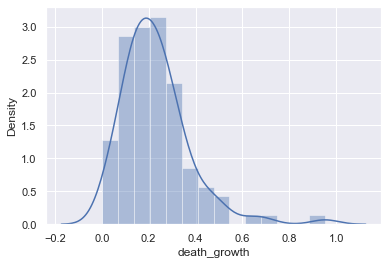

In [21]:
sns.distplot(data_new2['death_growth'])
#sns.distplot(ch_wo_null['cases_growth'])
#sns.distplot(data_new2['alcoholic_beverages'])
#sns.distplot(ch_wo_null['Share of deaths from smoking (%)'])
#sns.distplot(ch_wo_null['Cancers (%)'])
#sns.distplot(ch_wo_null['population growth rate'])
#sns.distplot(ch_wo_null['pneumonia-death-rates'])

In [22]:
NewDataframeName = data_new2.reset_index(drop = True)
NewDataframeName.describe(include='all')

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",...,bcg_coverage,bcg_year_delta,population growth rate,death rate,net migration rate,obesity - adult prevalence rate,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
count,103,103,103,103,103,103,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
unique,103,41,35,35,38,36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,2020-02-26,2020-03-11,2020-03-08,2020-03-16,2020-03-14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,9,8,16,19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.121835,0.230060,15.847214,6.506570,...,91.504854,6.106796,0.727767,7.933981,-0.344660,20.525243,74.514563,56.291262,66.61165,73.058252
std,NaN,NaN,NaN,NaN,NaN,NaN,0.074371,0.146269,7.458018,2.911792,...,13.941667,4.832311,1.238615,2.709987,9.902037,8.186200,12.103203,17.057361,13.82115,10.695267
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.001283,2.533060,2.154277,...,24.000000,5.000000,-6.680000,1.600000,-88.700000,3.600000,22.000000,22.000000,22.00000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.073483,0.129939,11.474504,4.938349,...,89.000000,5.000000,-0.065000,6.250000,-1.200000,18.750000,71.000000,52.000000,63.00000,70.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.104680,0.209057,14.413957,6.080061,...,98.000000,5.000000,0.720000,7.400000,-0.100000,21.800000,77.000000,61.000000,70.00000,75.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.157083,0.290279,19.397898,7.856173,...,99.000000,5.000000,1.280000,9.500000,2.000000,25.900000,82.000000,68.500000,75.00000,79.000000


In [23]:
NewDataframeName.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_Region                             103 non-null    object 
 1   first_1ConfirmedCases                      103 non-null    object 
 2   first_1Fatalities                          103 non-null    object 
 3   first_10ConfirmedCases                     103 non-null    object 
 4   first_50ConfirmedCases                     103 non-null    object 
 5   first_100ConfirmedCases                    103 non-null    object 
 6   cases_growth                               103 non-null    float64
 7   death_growth                               103 non-null    float64
 8   Cardiovascular diseases (%)                103 non-null    float64
 9   Diabetes, blood, & endocrine diseases (%)  103 non-null    float64
 10  Respiratory diseases (%)  

In [24]:
NewDataframeName.columns.values

array(['Country_Region', 'first_1ConfirmedCases', 'first_1Fatalities',
       'first_10ConfirmedCases', 'first_50ConfirmedCases',
       'first_100ConfirmedCases', 'cases_growth', 'death_growth',
       'Cardiovascular diseases (%)',
       'Diabetes, blood, & endocrine diseases (%)',
       'Respiratory diseases (%)', 'Liver disease (%)',
       'HIV/AIDS and tuberculosis (%)',
       'Malaria & neglected tropical diseases (%)',
       'Share of deaths from smoking (%)', 'alcoholic_beverages',
       'animal_fats', 'aquatic_products,_other',
       'cereals_-_excluding_beer', 'eggs', 'fish,_seafood',
       'fruits_-_excluding_wine', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants',
       'sugar_&_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products', 'hospital_beds_per10k', 'hospital_density',
       'medical_doctors_per10k', 'school_closure', 'bcg_coverage',
       'bcg_year_delta', 'population growth rate'

In [25]:
NewDataframeName = NewDataframeName.drop('first_1ConfirmedCases', axis=1)
NewDataframeName = NewDataframeName.drop('first_1Fatalities', axis=1)
NewDataframeName = NewDataframeName.drop('first_10ConfirmedCases', axis=1)
NewDataframeName = NewDataframeName.drop('first_50ConfirmedCases', axis=1)
NewDataframeName = NewDataframeName.drop('first_100ConfirmedCases', axis=1)
NewDataframeName = NewDataframeName.drop('animal_fats', axis=1)
NewDataframeName = NewDataframeName.drop('aquatic_products,_other', axis=1)
NewDataframeName = NewDataframeName.drop('cereals_-_excluding_beer', axis=1)
NewDataframeName = NewDataframeName.drop('eggs', axis=1)
NewDataframeName = NewDataframeName.drop('fish,_seafood', axis=1)
NewDataframeName = NewDataframeName.drop('fruits_-_excluding_wine', axis=1)
NewDataframeName = NewDataframeName.drop('miscellaneous', axis=1)
NewDataframeName = NewDataframeName.drop('offals', axis=1)
NewDataframeName = NewDataframeName.drop('oilcrops', axis=1)
NewDataframeName = NewDataframeName.drop('pulses', axis=1)
NewDataframeName = NewDataframeName.drop('spices', axis=1)
NewDataframeName = NewDataframeName.drop('starchy_roots', axis=1)
NewDataframeName = NewDataframeName.drop('stimulants', axis=1)
NewDataframeName = NewDataframeName.drop('sugar_&_sweeteners', axis=1)
NewDataframeName = NewDataframeName.drop('treenuts', axis=1)
NewDataframeName = NewDataframeName.drop('vegetable_oils', axis=1)
NewDataframeName = NewDataframeName.drop('vegetables', axis=1)
NewDataframeName = NewDataframeName.drop('vegetal_products', axis=1)
NewDataframeName = NewDataframeName.drop('hospital_beds_per10k', axis=1)
NewDataframeName = NewDataframeName.drop('hospital_density', axis=1)
NewDataframeName = NewDataframeName.drop('medical_doctors_per10k', axis=1)
NewDataframeName = NewDataframeName.drop('school_closure', axis=1)
NewDataframeName = NewDataframeName.drop('bcg_coverage', axis=1)
NewDataframeName = NewDataframeName.drop('bcg_year_delta', axis=1)
NewDataframeName = NewDataframeName.drop('FF_DayOfYear', axis=1)
NewDataframeName = NewDataframeName.drop('case1_DayOfYear', axis=1)
NewDataframeName = NewDataframeName.drop('case10_DayOfYear', axis=1)
NewDataframeName = NewDataframeName.drop('case50_DayOfYear', axis=1)
NewDataframeName

,Country_Region,cases_growth,death_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",Respiratory diseases (%),Liver disease (%),HIV/AIDS and tuberculosis (%),Malaria & neglected tropical diseases (%),Share of deaths from smoking (%),alcoholic_beverages,population growth rate,death rate,net migration rate,obesity - adult prevalence rate
0,Afghanistan,0.174179,0.083333,8.953006,5.273280,1.963170,0.498116,2.938014,1.393345,3.56,0.0,2.38,12.7,-0.1,5.5
1,Albania,0.068699,0.130051,27.016784,4.571592,3.251425,1.122277,0.051632,0.019658,19.09,62.0,0.28,7.1,-3.3,21.7
2,Algeria,0.158588,0.228578,17.005476,8.614000,3.475417,0.926308,0.390351,0.124510,10.92,6.0,1.52,4.4,-0.9,27.4
3,Andorra,0.082774,0.345238,13.784688,4.381889,4.771667,1.561389,0.334845,0.002159,14.24,0.0,-0.06,7.7,0.0,25.6
4,Argentina,0.118696,0.191227,15.781373,6.642161,4.140331,1.655163,0.958667,0.252262,15.81,93.0,0.86,7.4,-0.1,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Arab Emirates,0.169344,0.283333,11.278293,8.792682,5.432858,0.708467,0.394354,0.028203,9.14,0.0,1.49,2.0,7.6,31.7
99,United Kingdom,0.126304,0.159024,14.392087,4.287931,6.677914,1.441337,0.145590,0.078985,15.43,152.0,0.49,9.5,2.5,27.8
100,Uruguay,0.067719,0.500000,15.424930,5.935960,4.842926,1.155385,0.974250,0.043620,14.39,85.0,0.27,9.3,-0.9,27.9
101,Uzbekistan,0.156740,0.166667,26.112204,6.080061,2.135775,4.155907,1.479813,0.260031,10.08,41.0,0.88,5.4,-1.9,16.6


In [26]:
NewDataframeName.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_Region                             103 non-null    object 
 1   cases_growth                               103 non-null    float64
 2   death_growth                               103 non-null    float64
 3   Cardiovascular diseases (%)                103 non-null    float64
 4   Diabetes, blood, & endocrine diseases (%)  103 non-null    float64
 5   Respiratory diseases (%)                   103 non-null    float64
 6   Liver disease (%)                          103 non-null    float64
 7   HIV/AIDS and tuberculosis (%)              103 non-null    float64
 8   Malaria & neglected tropical diseases (%)  103 non-null    float64
 9   Share of deaths from smoking (%)           103 non-null    float64
 10  alcoholic_beverages       

Text(0.5, 1.0, 'Death growth and Obesity - adult prevalence rate')

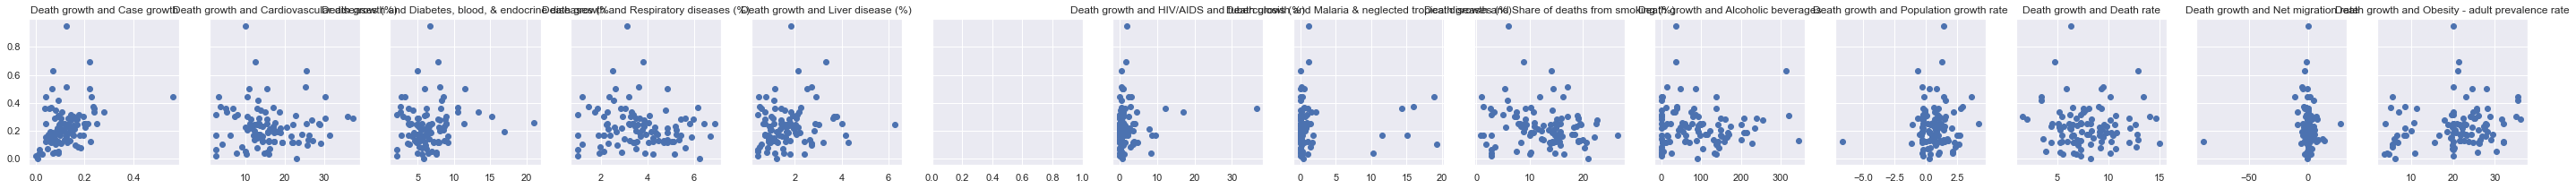

In [27]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13) = plt.subplots(1, 14, sharey=True, figsize =(50,3))
ax1.scatter(NewDataframeName['cases_growth'],NewDataframeName['death_growth'])
ax1.set_title('Death growth and Case growth')
ax2.scatter(NewDataframeName['Cardiovascular diseases (%)'],NewDataframeName['death_growth'])
ax2.set_title('Death growth and Cardiovascular diseases (%)')
ax3.scatter(NewDataframeName['Diabetes, blood, & endocrine diseases (%)'],NewDataframeName['death_growth'])
ax3.set_title('Death growth and Diabetes, blood, & endocrine diseases (%')
ax4.scatter(NewDataframeName['Respiratory diseases (%)'],NewDataframeName['death_growth'])
ax4.set_title('Death growth and Respiratory diseases (%)')
ax5.scatter(NewDataframeName['Liver disease (%)'],NewDataframeName['death_growth'])
ax5.set_title('Death growth and Liver disease (%)')
ax6.scatter(NewDataframeName['HIV/AIDS and tuberculosis (%)'],NewDataframeName['death_growth'])
ax6.set_title('Death growth and HIV/AIDS and tuberculosis (%)')
ax7.scatter(NewDataframeName['Malaria & neglected tropical diseases (%)'],NewDataframeName['death_growth'])
ax7.set_title('Death growth and Malaria & neglected tropical diseases (%)')
ax8.scatter(NewDataframeName['Share of deaths from smoking (%)'],NewDataframeName['death_growth'])
ax8.set_title('Death growth and Share of deaths from smoking (%)')
ax9.scatter(NewDataframeName['alcoholic_beverages'],NewDataframeName['death_growth'])
ax9.set_title('Death growth and Alcoholic beverages')
ax10.scatter(NewDataframeName['population growth rate'],NewDataframeName['death_growth'])
ax10.set_title('Death growth and Population growth rate')
ax11.scatter(NewDataframeName['death rate'],NewDataframeName['death_growth'])
ax11.set_title('Death growth and Death rate')
ax12.scatter(NewDataframeName['net migration rate'],NewDataframeName['death_growth'])
ax12.set_title('Death growth and Net migration rate')
ax13.scatter(NewDataframeName['obesity - adult prevalence rate'],NewDataframeName['death_growth'])
ax13.set_title('Death growth and Obesity - adult prevalence rate')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
NewDataframeName = NewDataframeName.drop('Country_Region', axis=1)
NewDataframeName

,cases_growth,death_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",Respiratory diseases (%),Liver disease (%),HIV/AIDS and tuberculosis (%),Malaria & neglected tropical diseases (%),Share of deaths from smoking (%),alcoholic_beverages,population growth rate,death rate,net migration rate,obesity - adult prevalence rate
0,0.174179,0.083333,8.953006,5.273280,1.963170,0.498116,2.938014,1.393345,3.56,0.0,2.38,12.7,-0.1,5.5
1,0.068699,0.130051,27.016784,4.571592,3.251425,1.122277,0.051632,0.019658,19.09,62.0,0.28,7.1,-3.3,21.7
2,0.158588,0.228578,17.005476,8.614000,3.475417,0.926308,0.390351,0.124510,10.92,6.0,1.52,4.4,-0.9,27.4
3,0.082774,0.345238,13.784688,4.381889,4.771667,1.561389,0.334845,0.002159,14.24,0.0,-0.06,7.7,0.0,25.6
4,0.118696,0.191227,15.781373,6.642161,4.140331,1.655163,0.958667,0.252262,15.81,93.0,0.86,7.4,-0.1,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.169344,0.283333,11.278293,8.792682,5.432858,0.708467,0.394354,0.028203,9.14,0.0,1.49,2.0,7.6,31.7
99,0.126304,0.159024,14.392087,4.287931,6.677914,1.441337,0.145590,0.078985,15.43,152.0,0.49,9.5,2.5,27.8
100,0.067719,0.500000,15.424930,5.935960,4.842926,1.155385,0.974250,0.043620,14.39,85.0,0.27,9.3,-0.9,27.9
101,0.156740,0.166667,26.112204,6.080061,2.135775,4.155907,1.479813,0.260031,10.08,41.0,0.88,5.4,-1.9,16.6


In [30]:
vif_test = NewDataframeName.drop("death_growth", axis=1)
vif_test

,cases_growth,Cardiovascular diseases (%),"Diabetes, blood, & endocrine diseases (%)",Respiratory diseases (%),Liver disease (%),HIV/AIDS and tuberculosis (%),Malaria & neglected tropical diseases (%),Share of deaths from smoking (%),alcoholic_beverages,population growth rate,death rate,net migration rate,obesity - adult prevalence rate
0,0.174179,8.953006,5.273280,1.963170,0.498116,2.938014,1.393345,3.56,0.0,2.38,12.7,-0.1,5.5
1,0.068699,27.016784,4.571592,3.251425,1.122277,0.051632,0.019658,19.09,62.0,0.28,7.1,-3.3,21.7
2,0.158588,17.005476,8.614000,3.475417,0.926308,0.390351,0.124510,10.92,6.0,1.52,4.4,-0.9,27.4
3,0.082774,13.784688,4.381889,4.771667,1.561389,0.334845,0.002159,14.24,0.0,-0.06,7.7,0.0,25.6
4,0.118696,15.781373,6.642161,4.140331,1.655163,0.958667,0.252262,15.81,93.0,0.86,7.4,-0.1,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.169344,11.278293,8.792682,5.432858,0.708467,0.394354,0.028203,9.14,0.0,1.49,2.0,7.6,31.7
99,0.126304,14.392087,4.287931,6.677914,1.441337,0.145590,0.078985,15.43,152.0,0.49,9.5,2.5,27.8
100,0.067719,15.424930,5.935960,4.842926,1.155385,0.974250,0.043620,14.39,85.0,0.27,9.3,-0.9,27.9
101,0.156740,26.112204,6.080061,2.135775,4.155907,1.479813,0.260031,10.08,41.0,0.88,5.4,-1.9,16.6


In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_test.columns

In [32]:
vif_data["VIF"] =[variance_inflation_factor(vif_test.values, i) for i in range(len(vif_test.columns))]
print(vif_data)

                                      feature        VIF
0                                cases_growth   5.537001
1                 Cardiovascular diseases (%)  21.135935
2   Diabetes, blood, & endocrine diseases (%)   6.832133
3                    Respiratory diseases (%)  16.065844
4                           Liver disease (%)   5.457675
5               HIV/AIDS and tuberculosis (%)   1.517821
6   Malaria & neglected tropical diseases (%)   3.612365
7            Share of deaths from smoking (%)  26.716912
8                         alcoholic_beverages   4.793039
9                      population growth rate   7.851412
10                                 death rate  19.033538
11                         net migration rate   3.814046
12            obesity - adult prevalence rate   7.947916


In [33]:
data_no_multicollinearity = NewDataframeName.drop(['Cardiovascular diseases (%)'], axis=1)
data_no_multicollinearity = data_no_multicollinearity.drop(['Respiratory diseases (%)'], axis=1)
data_no_multicollinearity = data_no_multicollinearity.drop(['Share of deaths from smoking (%)'], axis=1)
data_no_multicollinearity = data_no_multicollinearity.drop(['death rate'], axis=1)
data_no_multicollinearity

,cases_growth,death_growth,"Diabetes, blood, & endocrine diseases (%)",Liver disease (%),HIV/AIDS and tuberculosis (%),Malaria & neglected tropical diseases (%),alcoholic_beverages,population growth rate,net migration rate,obesity - adult prevalence rate
0,0.174179,0.083333,5.273280,0.498116,2.938014,1.393345,0.0,2.38,-0.1,5.5
1,0.068699,0.130051,4.571592,1.122277,0.051632,0.019658,62.0,0.28,-3.3,21.7
2,0.158588,0.228578,8.614000,0.926308,0.390351,0.124510,6.0,1.52,-0.9,27.4
3,0.082774,0.345238,4.381889,1.561389,0.334845,0.002159,0.0,-0.06,0.0,25.6
4,0.118696,0.191227,6.642161,1.655163,0.958667,0.252262,93.0,0.86,-0.1,28.3
...,...,...,...,...,...,...,...,...,...,...
98,0.169344,0.283333,8.792682,0.708467,0.394354,0.028203,0.0,1.49,7.6,31.7
99,0.126304,0.159024,4.287931,1.441337,0.145590,0.078985,152.0,0.49,2.5,27.8
100,0.067719,0.500000,5.935960,1.155385,0.974250,0.043620,85.0,0.27,-0.9,27.9
101,0.156740,0.166667,6.080061,4.155907,1.479813,0.260031,41.0,0.88,-1.9,16.6


In [34]:
vif_test = data_no_multicollinearity.drop("death_growth", axis=1)
vif_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   cases_growth                               103 non-null    float64
 1   Diabetes, blood, & endocrine diseases (%)  103 non-null    float64
 2   Liver disease (%)                          103 non-null    float64
 3   HIV/AIDS and tuberculosis (%)              103 non-null    float64
 4   Malaria & neglected tropical diseases (%)  103 non-null    float64
 5   alcoholic_beverages                        103 non-null    float64
 6   population growth rate                     103 non-null    float64
 7   net migration rate                         103 non-null    float64
 8   obesity - adult prevalence rate            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [35]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_test.columns

In [36]:
vif_data["VIF"] =[variance_inflation_factor(vif_test.values, i) for i in range(len(vif_test.columns))]
print(vif_data)

                                     feature       VIF
0                               cases_growth  4.867332
1  Diabetes, blood, & endocrine diseases (%)  5.298581
2                          Liver disease (%)  3.894135
3              HIV/AIDS and tuberculosis (%)  1.385670
4  Malaria & neglected tropical diseases (%)  2.772384
5                        alcoholic_beverages  3.211306
6                     population growth rate  6.532635
7                         net migration rate  3.525862
8            obesity - adult prevalence rate  6.698736


<a id="cell2"></a>
# 4. Data preparation
In this section, the dataset will be prepared for machine learning.

<a id="cell2.1"></a>
## 4.1 Feature Engineering
In this section, feature engineering is performed. Here, important information is extracted from the raw data.



In [37]:
data_no_multicollinearity.to_csv('train_dummies.csv', index = False)

In [38]:
targets = data_no_multicollinearity['alcoholic_beverages']
inputs = data_no_multicollinearity.drop(['alcoholic_beverages'], axis=1)
targets

0        0.0
1       62.0
2        6.0
3        0.0
4       93.0
       ...  
98       0.0
99     152.0
100     85.0
101     41.0
102     38.0
Name: alcoholic_beverages, Length: 103, dtype: float64

In [39]:
y = inputs['Liver disease (%)']
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   cases_growth                               103 non-null    float64
 1   death_growth                               103 non-null    float64
 2   Diabetes, blood, & endocrine diseases (%)  103 non-null    float64
 3   Liver disease (%)                          103 non-null    float64
 4   HIV/AIDS and tuberculosis (%)              103 non-null    float64
 5   Malaria & neglected tropical diseases (%)  103 non-null    float64
 6   population growth rate                     103 non-null    float64
 7   net migration rate                         103 non-null    float64
 8   obesity - adult prevalence rate            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


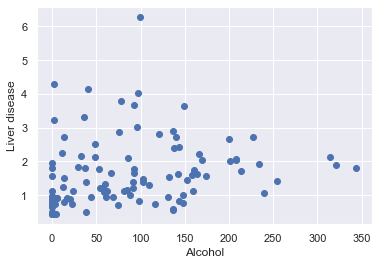

In [40]:
plt.scatter(targets, y)
plt.xlabel('Alcohol')
plt.ylabel('Liver disease')
plt.show()

In [41]:
x = sm.add_constant(targets)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Liver disease (%)   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.164
Date:                Tue, 04 Jan 2022   Prob (F-statistic):             0.0439
Time:                        21:01:11   Log-Likelihood:                -145.07
No. Observations:                 103   AIC:                             294.1
Df Residuals:                     101   BIC:                             299.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.4390      0.148      9.742      0.000       1.146       1.732
alcoholic_beverages     0.0025      0.001      2.041      0.044    7.04e-05       0.005
==============================================================================
Omnibus:                       47.898   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.325
Skew:                           1.758   Prob(JB):                     2.74e-27
Kurtosis:                       7.017   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

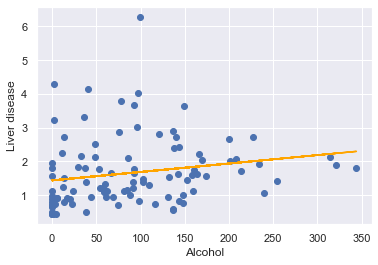

In [42]:
plt.scatter(targets, y)
yhat = 0.0025*targets + 1.4390
fig = plt.plot(targets, yhat, c='orange', label='reression line')
plt.xlabel('Alcohol')
plt.ylabel('Liver disease')
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [45]:
y_train.value_counts()

0.0      11
38.0      2
91.0      2
2.0       2
48.0      2
         ..
81.0      1
159.0     1
86.0      1
12.0      1
143.0     1
Name: alcoholic_beverages, Length: 63, dtype: int64

<a id="cell3.1"></a>
## 5 Logistic regression

In [46]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [47]:
y_hat = reg.predict(x_train)

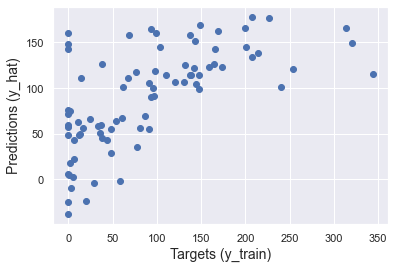

In [48]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=14)
plt.ylabel('Predictions (y_hat)', size=14)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

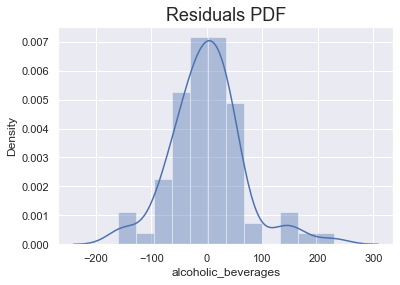

In [49]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [50]:
reg.score(x_train,y_train)

0.4157978256227316

In [51]:
reg.intercept_
reg.coef_
reg.summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg.summary['Weights'] = reg.coef_
reg.summary

,Features,Weights
0,cases_growth,-9.095213
1,death_growth,2.174800
2,"Diabetes, blood, & endocrine diseases (%)",-13.279028
3,Liver disease (%),5.427866
4,HIV/AIDS and tuberculosis (%),-3.507265
5,Malaria & neglected tropical diseases (%),29.743934
6,population growth rate,-69.590781
7,net migration rate,59.670311
8,obesity - adult prevalence rate,7.295591


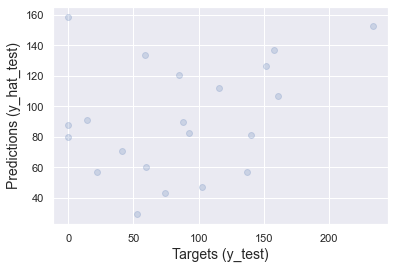

In [52]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=14)
plt.ylabel('Predictions (y_hat_test)', size=14)
plt.show()

In [53]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,3.510365e+59
1,8.885663e+54
2,1.853539e+26
3,5.029183e+18
4,4.074526e+48


In [54]:
y_test = y_test.reset_index(drop=True)
y_test.head()
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,3.510365e+59,4.154590e+68
1,8.885663e+54,1.029820e+66
2,1.853539e+26,1.142007e+26
3,5.029183e+18,1.373383e+32
4,4.074526e+48,2.388691e+50
5,5.107470e+24,3.150243e+59
6,2.633729e+52,8.223013e+36
7,1.947696e+35,6.327432e+60
8,1.958388e+66,4.216079e+101
9,1.515681e+58,4.201210e+25


In [55]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residuals,Difference%
0,3.510365e+59,4.154590e+68,4.154590e+68,1.000000e+02
1,8.885663e+54,1.029820e+66,1.029820e+66,1.000000e+02
2,1.853539e+26,1.142007e+26,-7.115316e+25,6.230534e+01
3,5.029183e+18,1.373383e+32,1.373383e+32,1.000000e+02
4,4.074526e+48,2.388691e+50,2.347945e+50,9.829424e+01
5,5.107470e+24,3.150243e+59,3.150243e+59,1.000000e+02
6,2.633729e+52,8.223013e+36,-2.633729e+52,3.202876e+17
7,1.947696e+35,6.327432e+60,6.327432e+60,1.000000e+02
8,1.958388e+66,4.216079e+101,4.216079e+101,1.000000e+02
9,1.515681e+58,4.201210e+25,-1.515681e+58,3.607725e+34


In [56]:
df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,4.947887e+67,2.007657e+100,2.007657e+100,4.938562e+69
std,2.262924e+68,9.200239e+100,9.200239e+100,2.263133e+70
min,5.181699e+12,1.000000e+00,-1.037098e+69,6.230534e+01
25%,1.853539e+26,6.398435e+17,-1.595112e+38,1.000000e+02
50%,1.595112e+38,8.223013e+36,1.041376e+23,1.000000e+02
75%,2.633729e+52,3.150243e+59,3.150243e+59,3.202876e+17
max,1.037098e+69,4.216079e+101,4.216079e+101,1.037098e+71


In [57]:
reg.score(x_test,y_test,)

0.004075369033738174

In [58]:
logistic_model = LogisticRegression(random_state=0, C=1e8)

In [59]:
result = logistic_model.fit(x_train,y_train)
prediction_test = logistic_model.predict(x_test)
prediction_train = logistic_model.predict(x_train)

In [60]:
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy auf dem Testdatensatz: {}'.format(acc))

Accuracy auf dem Testdatensatz: 0.09523809523809523


In [61]:
print("Trainingsdaten:")
print(classification_report(y_train,prediction_train))
print("Testdaten:")
print(classification_report(y_test,prediction_test))

Trainingsdaten:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         1
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1
        17.0       1.00      1.00      1.00         1
        20.0       1.00      1.00      1.00         1
        24.0       1.00      1.00      1.00         1
        29.0       1.00      1.00      1.00         1
        33.0       1.00      1.00      1.00         1
        36.0       1.00      1.00      1.00         1
        37.0       1.00      1.00      1.00         1
        38.

In [62]:
cm = confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(cm, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34], columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],)

Text(0.5, 39.5, 'Predicted label')

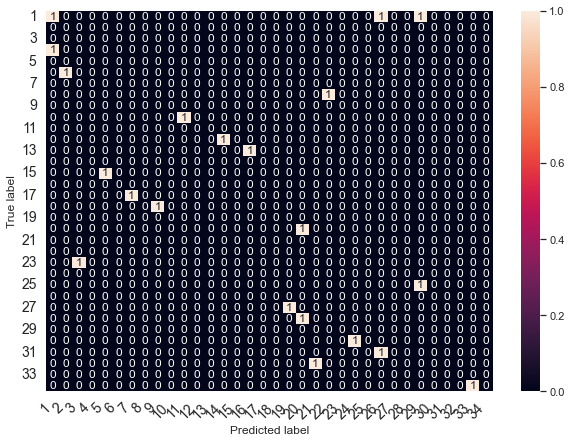

In [63]:
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')